In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'cv2'

#### 自适应阈值化分割 ####
```
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
```
1. src--输入，灰度图像；
2. maxValue--二值化后图像中的较大灰度值（较小值始终为0）
3. adaptiveMethod--自适应阈值算法, 可选 ADAPTIVE_THRESH_MEAN_C（局部邻域块均值） 或 ADAPTIVE_THRESH_GAUSSIAN_C（局部邻域块高斯加权法）
4. thresholdType--二值化方法，只能选 THRESH_BINARY 或 THRESH_BINARY_INV；
5. blockSize--计算区域阈值的块大小，取奇数3、5、7等, 需多试几次；
6. C--常数，每个区域计算出的阈值的基础上再减去这个常数作为这个区域的最终阈值

In [1]:
image = cv2.imread('../TestFigures/BirdFly.png') 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 自适应阈值化
bin_im = cv2.adaptiveThreshold(gray, 240, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=101, C=6) 

# 形态学开运算去除噪声
se = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7), (-1, -1))
bin_im = cv2.morphologyEx(bin_im, cv2.MORPH_OPEN, se)   # 开运算去除噪声

plt.rcParams['figure.figsize'] = [14, 12]
plt.subplot(121), plt.title('original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(122), plt.title('adapt_thresh')
plt.imshow(bin_im, cmap='gray')

plt.show()

#np.min(bin_im)

NameError: name 'cv2' is not defined

#### 漫水填充法分割 ####
```
cv2.floodFill(src, mask, seed_point, new_val, low_diff, up_diff, flags)
```
1. src--输入，8位或浮点输入图像；
2. mask--单通道8位掩膜图像，长宽需比输入图像大两个像素，当flag指定FLOODFILL_MASK_ONLY时，算法不填充掩膜中非零像素区域，且填充的结果保存于 mask；
3. seed_point--种子点，即起始点；
4. new_val--像素点填充后被染色的值；
5. low_diff--待加入的像素与当前观察像素之间的颜色的最大负差值；
6. up_diff--待加入的像素与当前观察像素之间的颜色的最大正差值；
7. flags -- 操作标志符, 低八位用于控制算法的连通性，可取4(默认4连通)或者8，高8位建议 FLOODFILL_FIXED_RANGE, 此时考虑当前像素与种子像素之间的差，否则将考虑当前像素与其相邻像素的差

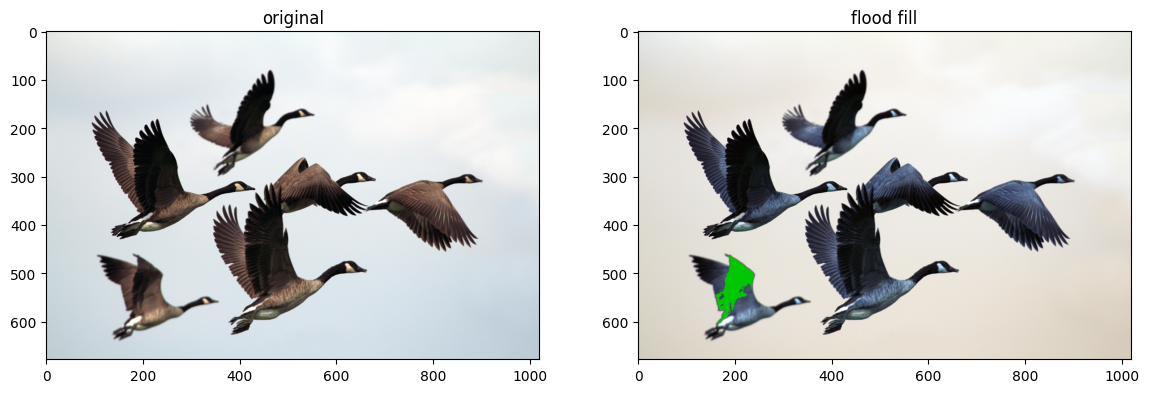

In [6]:
rows, cols, _ = image.shape
mask = np.zeros((rows+2, cols+2), dtype=np.uint8)
#mask[0:rows//2, 0:cols//2] = 1

newVal = (0, 200, 0)
lowV   = (60, 60, 60)
upV    = (50, 50, 50)
seed   = (200, 550)
flags  = 4 | cv2.FLOODFILL_FIXED_RANGE #| cv2.FLOODFILL_MASK_ONLY

ret, bin_im, mask, rect = cv2.floodFill(image.copy(), mask, seed, newVal, lowV, upV, flags)
# ret-填充像素数目，rect-填充矩形范围

#plt.rcParams['figure.figsize'] = [14, 12]
plt.subplot(121), plt.title('original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(122), plt.title('flood fill')
plt.imshow(bin_im, cmap='gray')

#bin_im.shape